In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1.1 Đọc dữ liệu
df = pd.read_csv('orginal_sales_data_edit.csv',encoding='utf-8', header=0)

In [3]:
#1.2 Loại bỏ dữ liệu rỗng
df.dropna(how='all', inplace=True)

In [4]:
#1.3 Loại bỏ dữ liệu trùng, biết rằng dữ liệu trùng là dữ liệu có đồng thời ORDERNUMBER và ORDERNATE như nhau 
# (*) Kiểm tra lại nghiệp vụ này
df.drop_duplicates(inplace=True)

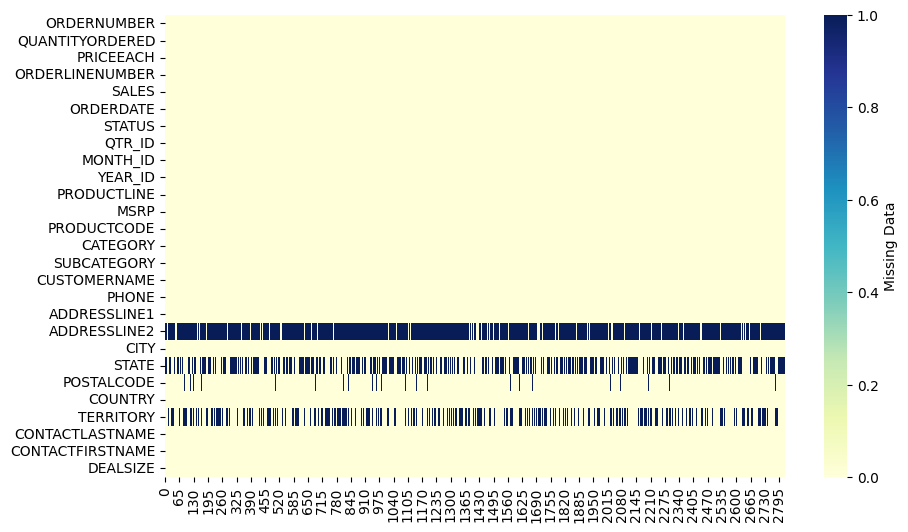

In [5]:
#1.4 Kiểm tra các dữ liệu thiếu bằng chart
# Trực quan dữ liệu thiếu với Seaborrn Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("my_missing_value_1.png", dpi=100)


<Figure size 1000x600 with 0 Axes>

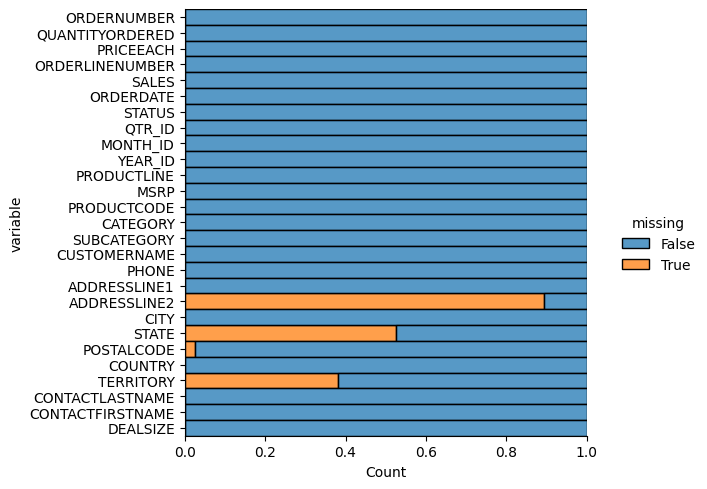

In [6]:
#Cách 2: 1.4 Kiểm tra các dữ liệu thiếu bằng chart
# Trực quan dữ liệu thiếu với Seaborn Displot
from tkinter import MULTIPLE


plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

plt.savefig("my_missing_value_2.png", dpi=100)



In [7]:
#1.4.1 Điền thiếu dữ liệu với dữ liệu định tính
    #1.4.1.1 Với dữ liệu biểu diễn dạng chuỗi thì thay bằng Unknown
    #1.4.1.2 Với dữ liệu biểu diễn dạng bằng 0
df['ADDRESSLINE2'].fillna('Unknown', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna(0,inplace=True)

In [11]:
#1.5 Tách cột PAYMENTFULLNAME thành PAYMENTLASTNAME và PAYMENTFIRSTNAME, sau đó xóa cột PAYMENTFULLNAME


df[['CONTACTLASTNAME','CONTACTFIRSTNAME']]

,CONTACTLASTNAME,CONTACTFIRSTNAME
0,Yu,Kwai
1,Henriot,Paul
2,Da Cunha,Daniel
3,Young,Julie
4,Brown,Julie
...,...,...
2818,Freyre,Diego
2819,Koskitalo,Pirkko
2820,Freyre,Diego
2821,Roulet,Annette


In [12]:
#1.6 Lưu dữ liệu đã xử lý thành file với tên processed_sales_data
df.to_csv('processed_sales_data.csv',sep=',',encoding='utf-8',index=False)

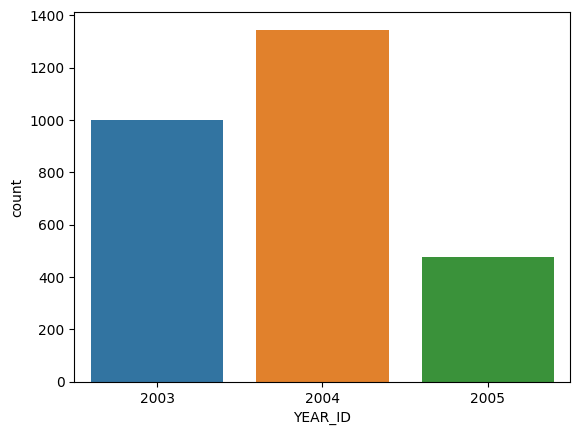

In [13]:
#1.1.1 Hãy cho biết số lượng đơn hàng theo năm(YEAR_ID)
sns.countplot(x='YEAR_ID',data=df)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16124\928348292.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR_ID',


<AxesSubplot: xlabel='YEAR_ID', ylabel='ORDERNUMBER'>

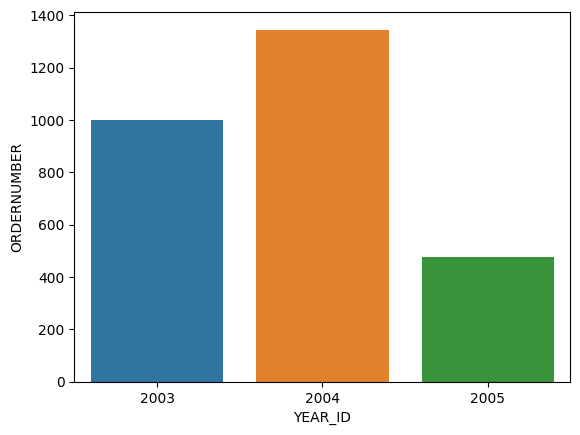

In [14]:
#Có thể dùng biểu đồ barplot với nhiều tùy chính trong hàm tổng hợp: count, mean,sum, min, max, std
from numpy import count_nonzero
sns.barplot(x='YEAR_ID',
            y ='ORDERNUMBER',
            data=df,ci = None, estimator=(count_nonzero))


C:\Users\Admin\AppData\Local\Temp\ipykernel_16124\4033398329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR_ID',


<AxesSubplot: xlabel='YEAR_ID', ylabel='QUANTITYORDERED'>

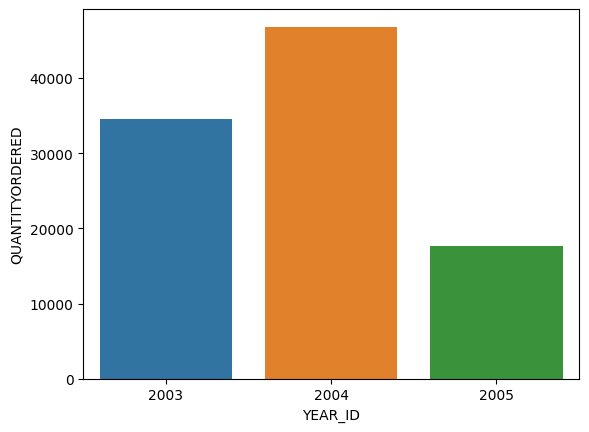

In [16]:
#1.1.1 Hãy cho biết ố lượng sản phẩm bán theo năm(YEAR_ID)
sns.barplot(x='YEAR_ID',
            y='QUANTITYORDERED',
            data=df,ci=None,estimator=sum)

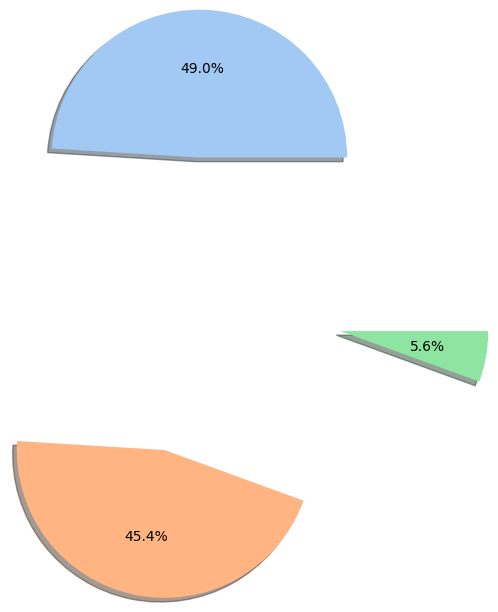

In [18]:
#1.1.2 Hãy cho biết tỉ lệ số đơn hàng theo DEALSIZE

labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values,labels==labels, colors = colors,autopct='%1.1f%%', shadow=True)
plt.show()

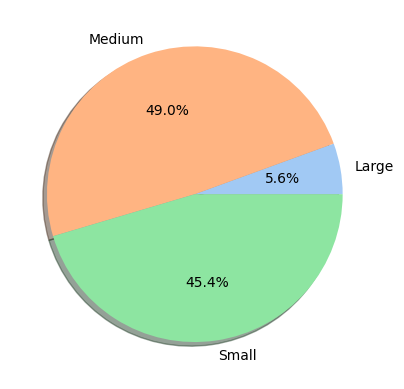

In [19]:
#Hoặc sử dụng nâng cao với nhiều tùy chỉnh trong hàm tổng hợp

gb=df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
data=list(gb['count'])
labels = gb.index
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True)
plt.show()

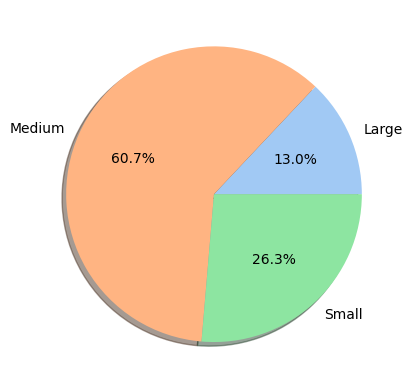

In [20]:
#1.1.3 Hãy cho biết ttir lệ giá trị SALES theo DEALSIZE
gb=df.groupby(['DEALSIZE'])['SALES'].agg(['sum'])
data=list(gb['sum'])
labels=gb.index
colors=sns.color_palette('pastel')
plt.pie(data, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

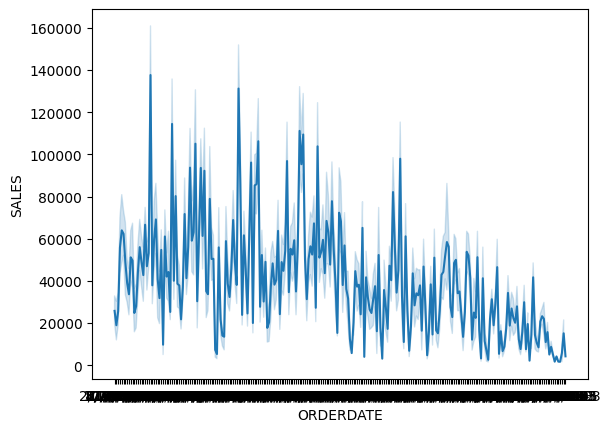

In [21]:
#1.1.7 Hãy cho biết tổng giá trị SALES theo ngày
sns.lineplot(x='ORDERDATE', y='SALES', data=df, estimator=sum)
plt.show()

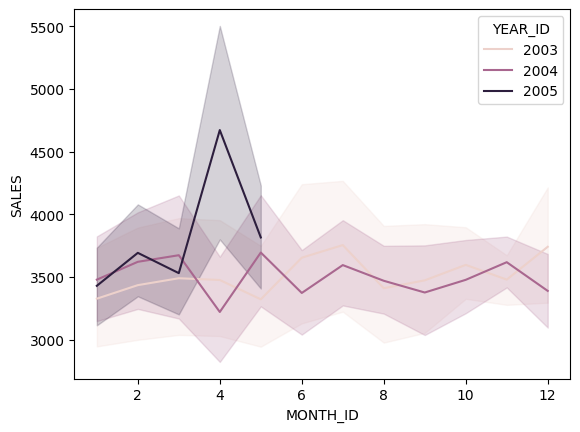

In [22]:
#1.1.8 Hãy cho biết giá trị SALES trung bình theo tháng năm
sns.lineplot(x="MONTH_ID",y="SALES",hue="YEAR_ID",data=df)
plt.show()

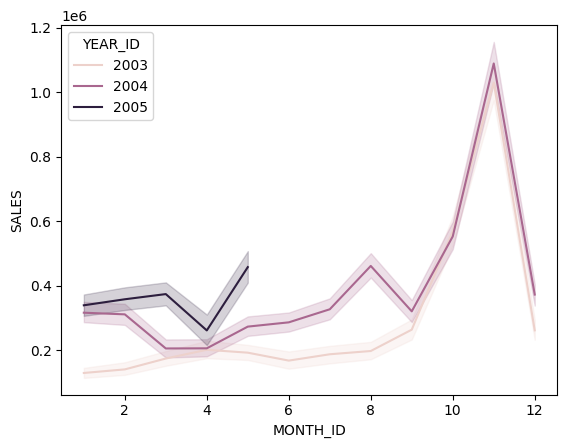

In [23]:
#1.1.8 Hãy cho biết tổng giá trị SALES theo tháng năm
sns.lineplot(x="MONTH_ID",y="SALES",hue="YEAR_ID",data=df,estimator=sum)
plt.show()

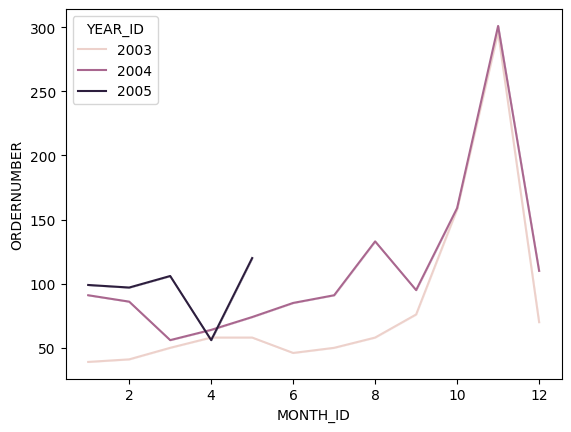

In [24]:
#1.1.9 Hãy cho biết số lượng hóa đơn theo tháng,năm
# Gợi ý: Biểu đồ line
sns.lineplot(x="MONTH_ID",y="ORDERNUMBER",hue="YEAR_ID",data=df,estimator=count_nonzero)
plt.show()

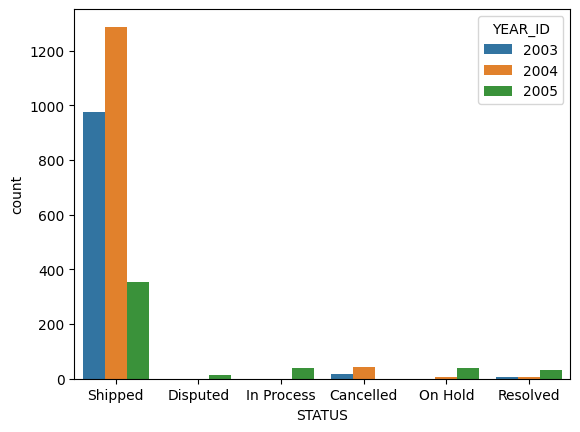

In [25]:
#1.2.1 Hãy cho biêt strangj thái số đơn hàng (STATUS) theo nhóm các năm (YEAR_ID)

sns.countplot(x="STATUS", data=df,hue="YEAR_ID")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16124\3177737666.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STATUS',


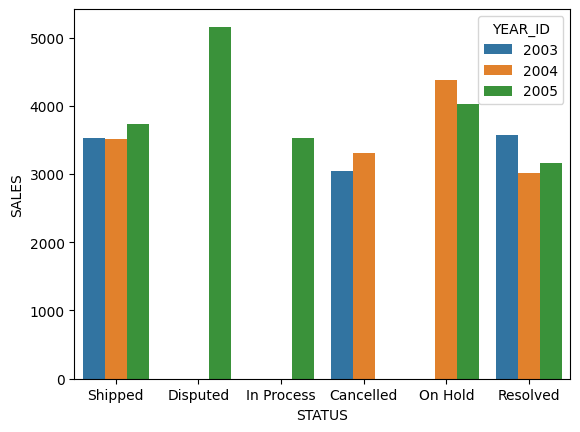

In [26]:
#1.2.1 Hãy cho biết trung bình giá trị đơn hàng theo trạng thái STATUS theo nhóm các năm YEAR_ID

sns.barplot(x='STATUS',
            y='SALES',
            hue='YEAR_ID',
            data=df, ci = None)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16124\3661161761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STATUS',


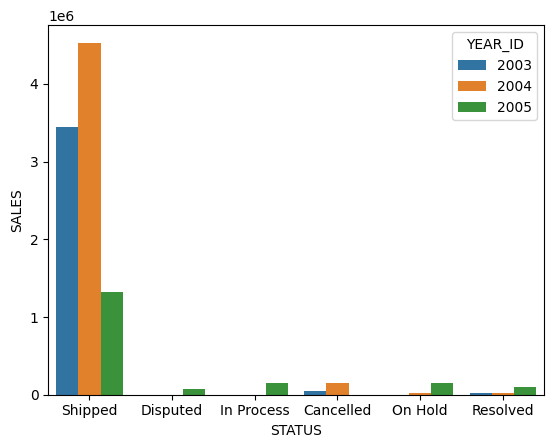

In [27]:
#1.2.1 Hãy cho biết tổng giá trị đơn hàng theo STATUS theo nhóm năm YEAR_ID
sns.barplot(x='STATUS',
            y='SALES',
            hue='YEAR_ID',
            data=df, ci = None, estimator=sum)
plt.show()

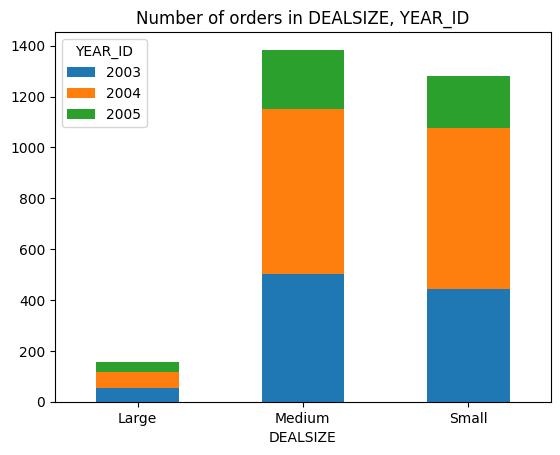

In [28]:
#1.2.3 Hãy cho biết số lượng hóa đơn giữa các nhóm DEALSIZE theo YEAR_ID
gb=df.groupby(['DEALSIZE','YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind='bar', stacked=True)

#Just add a title and rotate the x-axis labels to be horizontal
plt.title('Number of orders in DEALSIZE, YEAR_ID')
plt.xticks(rotation=0,ha='center')
plt.show()

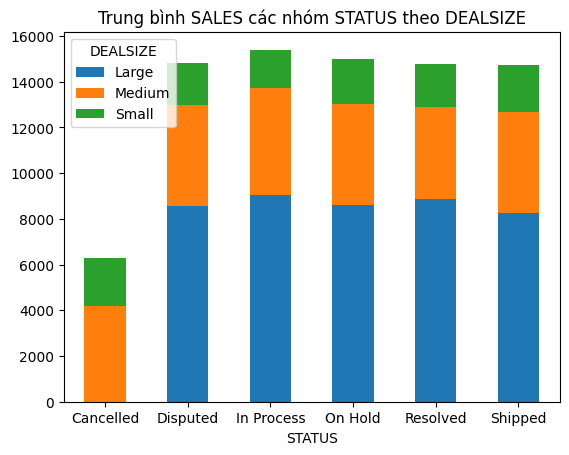

In [29]:
#1.2.3 Hãy cho biết trung bình SALES giữa các nhóm STATUS theo DEALSIZE
gb=df.groupby(['STATUS','DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind='bar', stacked=True)

#Just add a title and rotate the x-axis labels to be horizontal
plt.title('Trung bình SALES các nhóm STATUS theo DEALSIZE')
plt.xticks(rotation=0,ha='center')
plt.show()

In [30]:
#2.1.1.1 Mô tả dữ liệu của QUANTITYORDERED
df['QUANTITYORDERED'].describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [32]:
#2.1.1.1 Mô tả dữ liệu của QUANTITYORDERED,PRICEACH,SALES
df[['QUANTITYORDERED','PRICEEACH','SALES']].describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


In [33]:
#2.1.1.1 Mô tả dữ liệu SALES theo nhóm DEALSIZE
df.groupby('DEALSIZE')['QUANTITYORDERED'].describe()

# hoặc dùng: df.groupby('DEALSIZE')['SALES'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,47.222930,10.082098,29.0,42.0,46.0,50.0,97.0
Medium,1384.0,37.947254,8.443130,20.0,32.0,39.0,45.0,66.0
Small,1282.0,30.525741,8.485265,6.0,24.0,29.0,36.0,64.0


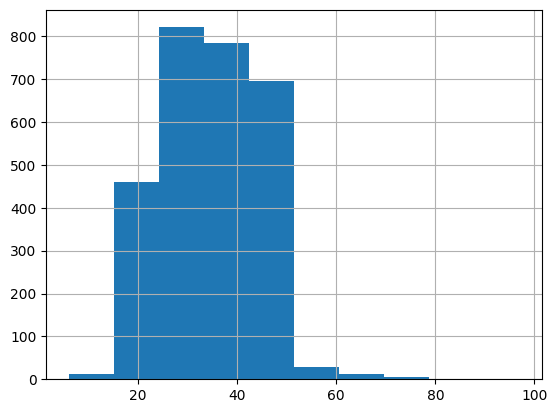

In [36]:
#2.1.2.1 Vẽ biểu đồ Histogram của QUANTITYORDERED
df['QUANTITYORDERED'].hist()
plt.show()

# hoặc
#sns.displot(df,x="QUANTITYORDERED", kind="kde")
#plt.shot()

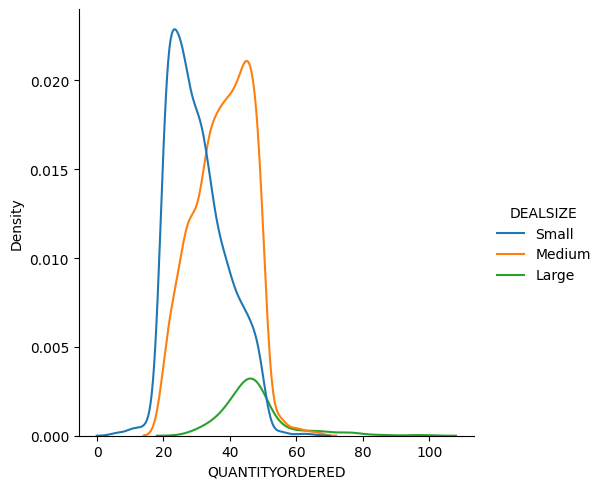

In [38]:
#2.1.2.2 Vẽ biểu đồ histogram của quantityordered theo dealsize
#Phân phối histogram của quantityordered theo nhóm dealsize

sns.displot(df,x="QUANTITYORDERED", hue="DEALSIZE",kind="kde") # kind=True
plt.show()

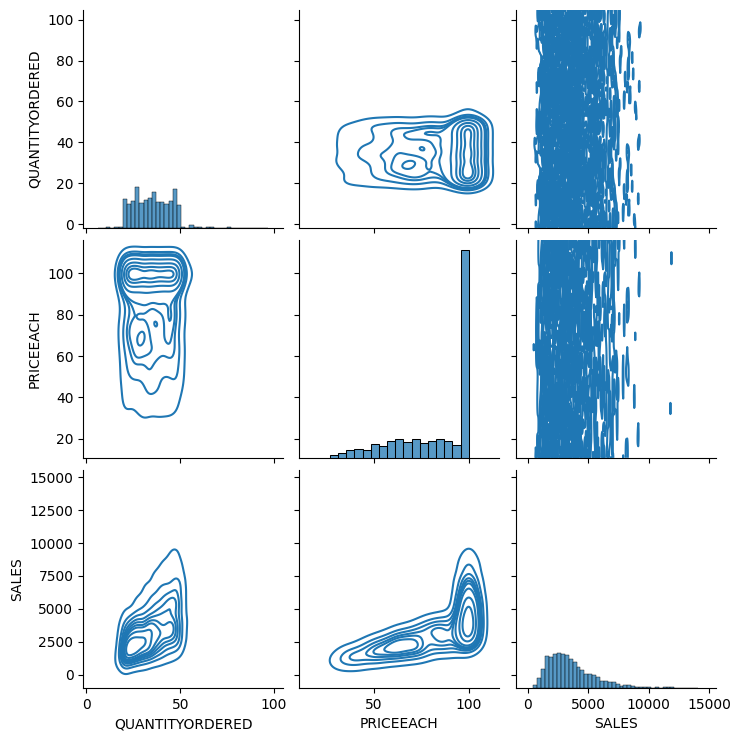

In [39]:
# Vẽ biểu đồ Pairplot của QUANTITYORDERED, PRIEACH, SALES
sns.pairplot(df[['QUANTITYORDERED','PRICEEACH','SALES']],diag_kind='hist', kind='kde')
plt.show()

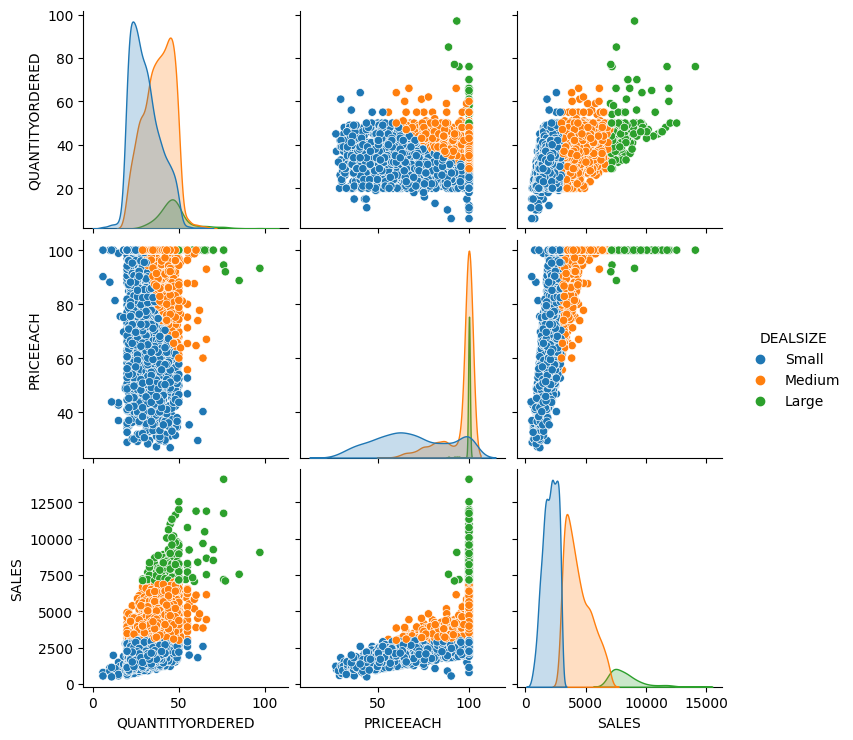

In [40]:
# Phân phối Pairplot Histogram của QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSEIZE
sns.pairplot(df[['QUANTITYORDERED','PRICEEACH','SALES','DEALSIZE']],hue='DEALSIZE')
plt.show()

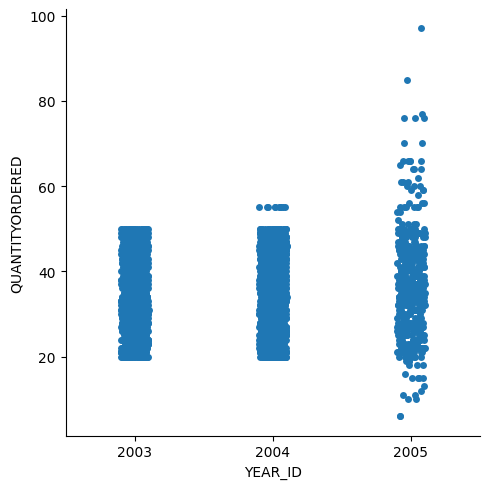

In [41]:
#2.1.3.0 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm của QUANTIYORDERED (catplot)
sns.catplot(x='YEAR_ID',y='QUANTITYORDERED',data=df)
plt.show()

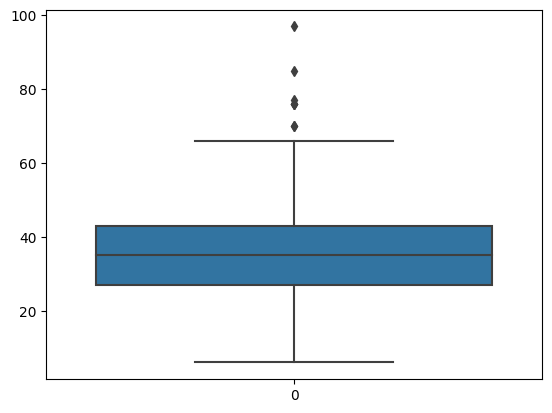

In [42]:
#2.1.3.1 Hãy vẽ trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED
sns.boxplot(data=df['QUANTITYORDERED'])
plt.show()

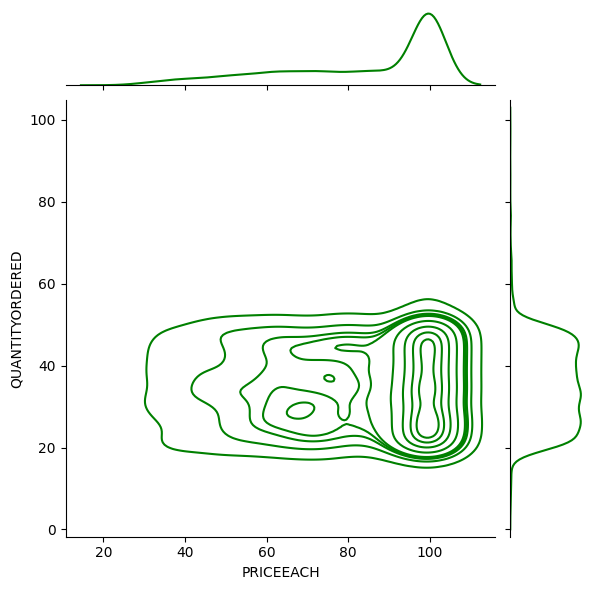

In [45]:
#2.1.2.3 Vẽ biểu đồ Joinplot của QUANTITYORDERED và PRICEEACH
sns.jointplot(data=df,x='PRICEEACH', y='QUANTITYORDERED',kind='kde',color='g')
plt.show()

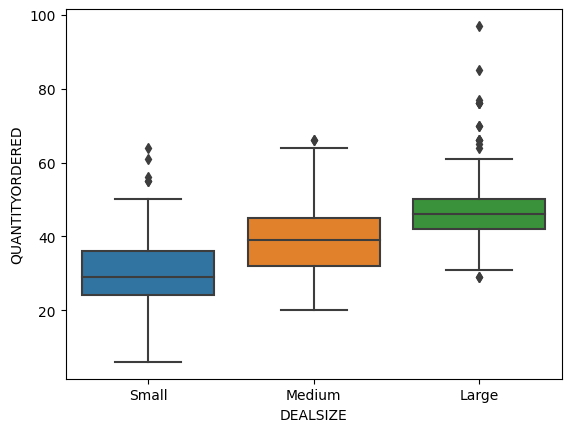

In [46]:
#2.1.3.3 Biểu diễn boxplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.boxplot(x='DEALSIZE',y='QUANTITYORDERED',data=df)
plt.show()

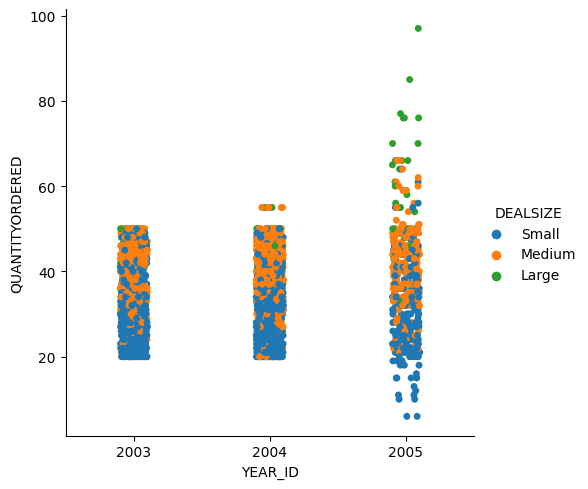

In [47]:
#2.1.3.3 Biểu diễn catplot của QUANTITYORDERED theo nhóm DEALSIZE
sns.catplot(x='YEAR_ID',y='QUANTITYORDERED',hue='DEALSIZE',data=df)
plt.show()

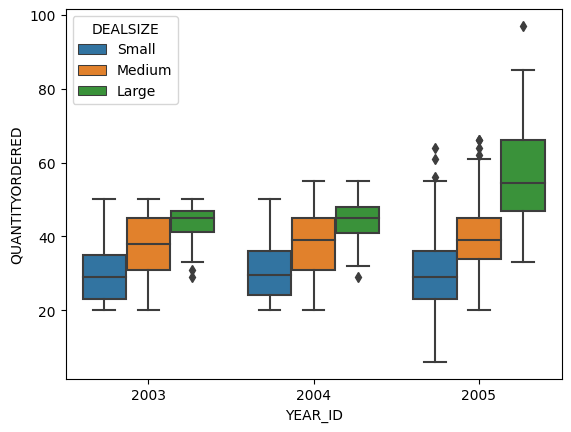

In [48]:
#2.1.3.4 Biểu diễn boxplot của QUANTITYORDERED theo năm nhóm DEALSIZE
sns.boxplot(x='YEAR_ID', y='QUANTITYORDERED', hue='DEALSIZE',data=df)
plt.show()

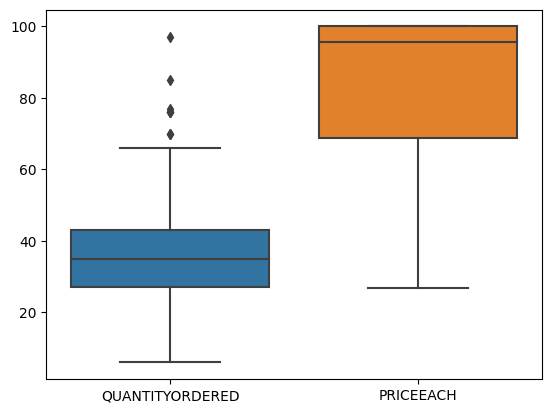

In [49]:
#2.1.3.5 Biểu diễn boxplot của QUANTITYORDERED, PRICEEACH
sns.boxplot(data=df[['QUANTITYORDERED','PRICEEACH']])
plt.show()

In [50]:
#2.1.4.1 Độ xiên của phân phối Skew của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED','PRICEEACH']].skew()

QUANTITYORDERED    0.362585
PRICEEACH         -0.946649
dtype: float64

In [51]:
#2.1.4.1 Độ xiên của phân phối Kutorsis của QUANTITYORDERED, PRICEEACH
df[['QUANTITYORDERED','PRICEEACH']].kurtosis()

QUANTITYORDERED    0.415744
PRICEEACH         -0.374818
dtype: float64

In [53]:
#2.1.6 Kiểm tra tính chuẩn của QUANTITYORDER, PRICEEACH, SALES
from scipy import stats
stats.probplot(df['QUANTITYORDERED'],plot=sns.mp1.pyplot)
plt.show()

ModuleNotFoundError: No module named 'scipy'

In [54]:
import numpy as np

In [ ]:
#2.1.7 Transform dữ liệu và kiểm thử Normality của biến TRANSFORMEQUANTITYORDERED
from scipy import stats

df['TRANSFORMEDQUANTITYORDERED'] = df[['QUANTITYORDERED']].transform(func=lambda x: np.log(x))
stats.probplot(df['TRANSFORMEDQUANTITYORDERED'], plot=sns.mp1.pyplot)
plt.show()

In [56]:
#2.2.1 Ma trận tương quan tuyến tính 
df[['QUANTITYORDERED','PRICEEACH','SALES']].corr()
# hoặc .cov()

,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,1.000000,0.005564,0.551426
PRICEEACH,0.005564,1.000000,0.657841
SALES,0.551426,0.657841,1.000000


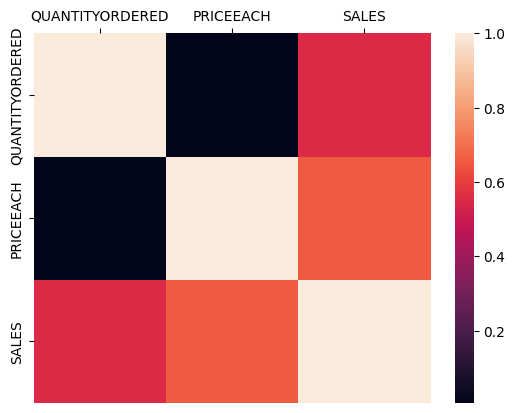

In [57]:
#2.2.2 Vẽ biểu đồ Heatmap tương quan của các cặp QUANTITYORDERED, PRICEEACH, SALES
sns.heatmap(df[['QUANTITYORDERED','PRICEEACH','SALES']].corr(), vmax=1.0,square=False).xaxis.tick_top()

In [59]:
#2.2.3 Tương quan của biến QUANTITYORDERED, PRICEEACH,SALES theo nhóm DEALSIZE
df.groupby('DEALSIZE')[['QUANTITYORDERED','PRICEEACH','SALES']].corr()

QUANTITYORDERED  PRICEEACH     SALES
DEALSIZE                                                      
Large    QUANTITYORDERED         1.000000  -0.569684  0.317111
         PRICEEACH              -0.569684   1.000000  0.073529
         SALES                   0.317111   0.073529  1.000000
Medium   QUANTITYORDERED         1.000000  -0.443546  0.344825
         PRICEEACH              -0.443546   1.000000  0.444365
         SALES                   0.344825   0.444365  1.000000
Small    QUANTITYORDERED         1.000000  -0.504154  0.312224
         PRICEEACH              -0.504154   1.000000  0.632605
         SALES                   0.312224   0.632605  1.000000

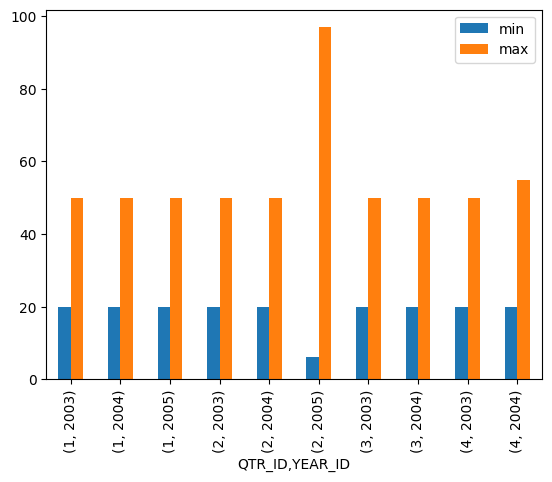

In [60]:
#2.2.4 Vẽ biểu đồ cho biết giá trị min, max của số lượng sản phẩm trong mỗi đơn hàng theo quý, năm 
# Gợi ý: Biểu đồ so sánh nhóm un-stacked(vertical)
gb=df.groupby(['QTR_ID','YEAR_ID'])['QUANTITYORDERED'].agg(['min','max'])
gb.plot(kind='bar', stacked=False)
plt.show()

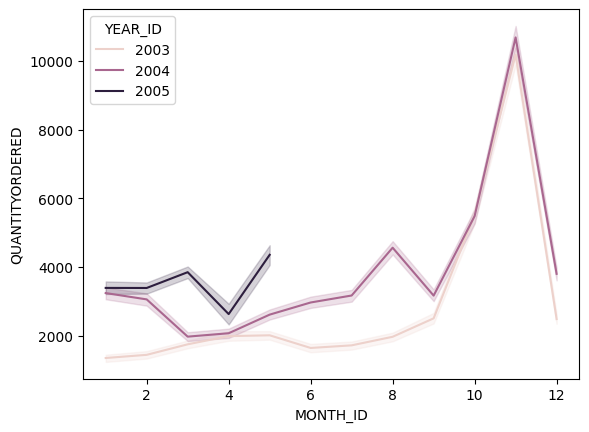

In [61]:
#2.2.5 Biểu đồ cho biết tổng só lượng sản phẩm theo tháng
# GỢi ý Biểu đồ line có 2 đường Ox = tháng, Oy = tổng số lượng
sns.lineplot(x="MONTH_ID",y="QUANTITYORDERED",hue='YEAR_ID',data=df,estimator=sum)
plt.show()

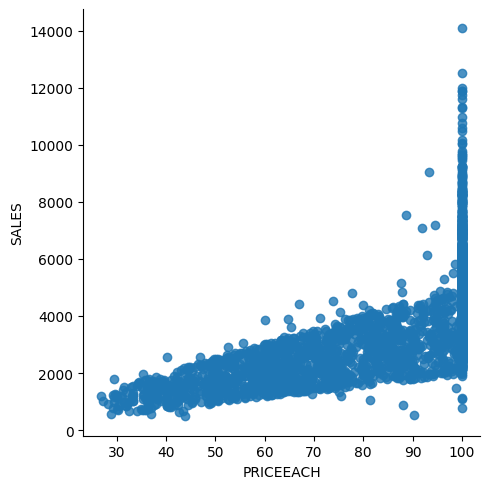

In [62]:
#2.2.6 Vẽ biểu đồ cho biết quan hệ giữa SALES oy và đơn giá Ox
# Gợi ý Biểu đồ Scatter
sns.lmplot(data=df,x='PRICEEACH',y='SALES',fit_reg=False)
plt.show()

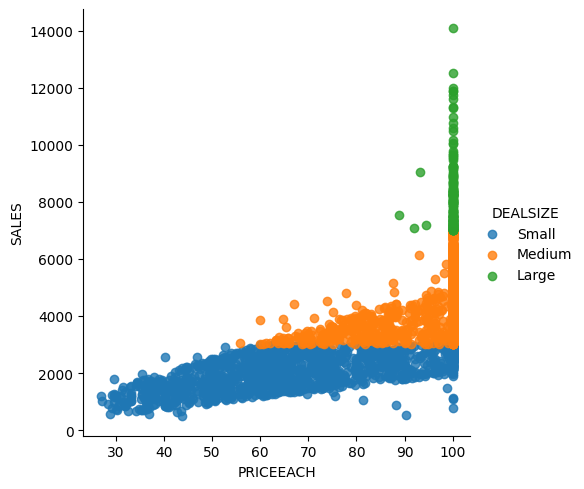

In [63]:
#2.2.7 Vẽ biểu đồ cho biết quan hệ giữa SALES oy và đơn giá Ox theo DEALSIZE
sns.lmplot(data=df,x='PRICEEACH',y='SALES',hue='DEALSIZE',fit_reg=False)
plt.show()

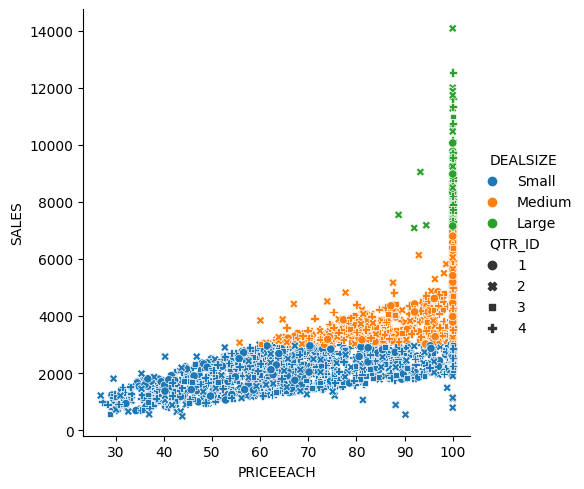

In [65]:
#2.2.8 Vẽ biểu đồ cho biết quan hệ giữa SALES oy và đơn giá Ox theo quý theo DEALSIZE
sns.relplot(data=df,x='PRICEEACH',y='SALES',hue='DEALSIZE',style='QTR_ID')
plt.show()

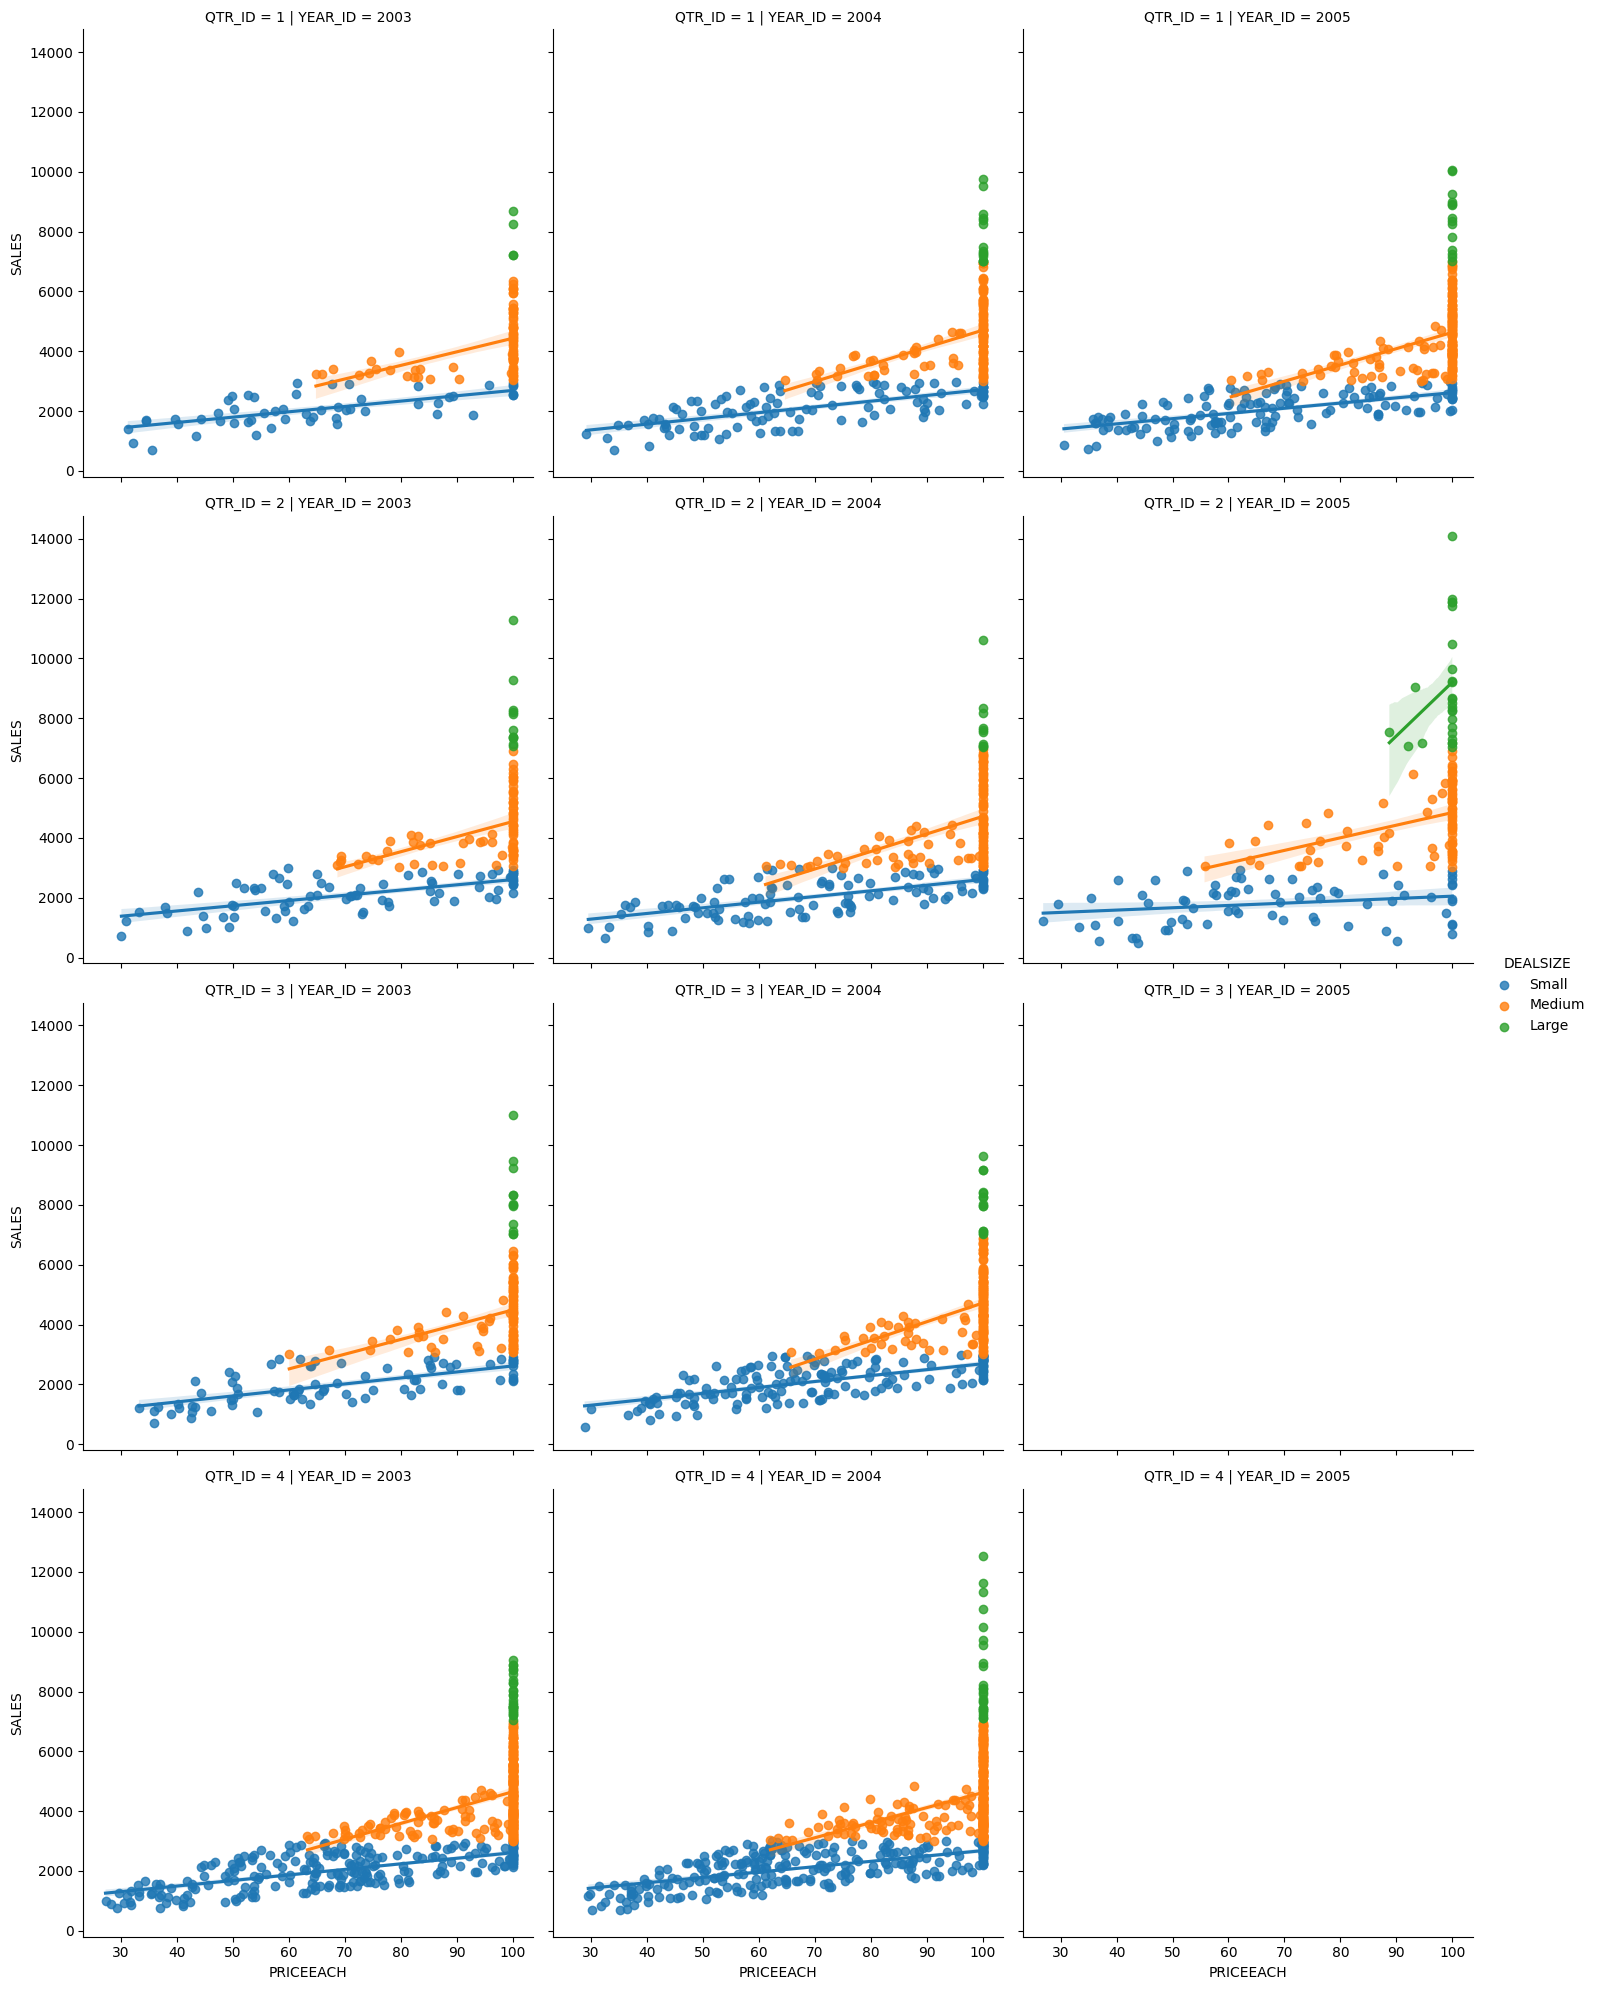

In [66]:
#2.2.9 Vẽ biểu đồ cho biết quan hệ giữa SALES oy và đơn giá ox theo dealsize
sns.lmplot(data=df,x='PRICEEACH',y='SALES',hue='DEALSIZE',col='YEAR_ID',row='QTR_ID',fit_reg=True)
plt.show()